# Total Absorption Rate Analysis
This notebook is intended to be applied for the analysis of the Total Absorption Rate ($\gamma$).

#### Input:
- tar_table_df: Total Absorption Rate (TAR) stored dataframe. This df is calculated at ``SOF_calculation.ipynb``.


## Load libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from os import walk
from pathlib import Path

import seaborn as sns
sns.set()

Define plotting functions

In [2]:
def plot_abs_rate(wl, spec_abs_rate_int, ax,star,hz,atmos,pigm, col):
    """Helper function to plot spectral absorption rate"""        
    ax.plot(wl, spec_abs_rate_int, c = col, lw = 1, label = pigm)
    ax.set_xlim(2500, 8500)
    #ax.set_ylim(0,4.5e-2)
    #ax.set_yscale('log')
    #ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 1), useMathText = True, useOffset=False)
    ax.tick_params(axis = 'y', labelsize = 10)
    ax.tick_params(axis = 'x', labelsize = 10)

sampling = 25
from scipy.ndimage.filters import uniform_filter1d
def plot_abs_rate_M(wl, spec_abs_rate_int, ax,star,hz,atmos,pigm, col):
    """Helper function to plot spectral absorption rate"""        
    ax.plot(wl, uniform_filter1d(spec_abs_rate_int, size = sampling, axis = 0), c = col, lw = 1, label = pigm)
    ax.set_xlim(2500, 8500)
    ax.set_ylim(0,4.5)
    #ax.set_yscale('log')
    #ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 1), useMathText = True, useOffset=False)
    ax.tick_params(axis = 'y', labelsize = 10)
    ax.tick_params(axis = 'x', labelsize = 10)
    
def plot_abs_rate_inset_M(wl, spec_abs_rate_int, ax, star,hz,atmos,pigm, col):
    """Helper function to plot spectral absorption rate"""        
    ax.plot(wl, uniform_filter1d(spec_abs_rate_int, size = sampling, axis = 0), c = col, lw = 1, label = pigm)
    ax.set_xlim(7100,8370)
    ax.autoscale(enable=True, axis='y', tight=True)
    ax.yaxis.set_ticklabels([])
    ax.tick_params(axis = 'x', labelsize = 8)
    
    
    

Define available cases to plot

In [3]:
#pigm = ['ChlA', 'ChlB', 'BChlA', 'BChlB', 'phot0']
#hz = ['hzi','hzm','hzo']
#star_type = ['a5v','g2v','m8v']
#atmos = ['os1','os2','os3','os4']

## Figure of the Total Spectral Absorption Rate ($\gamma_t$) as a function of the habitable zone 

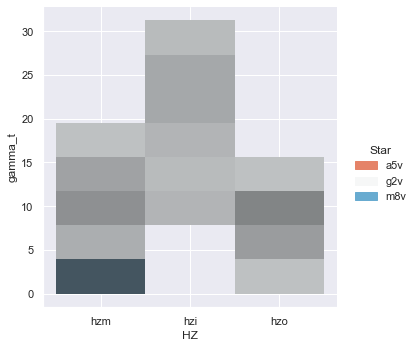

In [4]:
# Retrieve stored dataframe
%store -r tar_table_df

#Rename table1 IS NOT hzm!!!
#table1 = tar_table_df[table1_hzm['Pigment'].isin(pigm)]


                               
ax=sns.displot( y='gamma_t', x='HZ',hue='Star', palette="RdBu", data=tar_table_df)



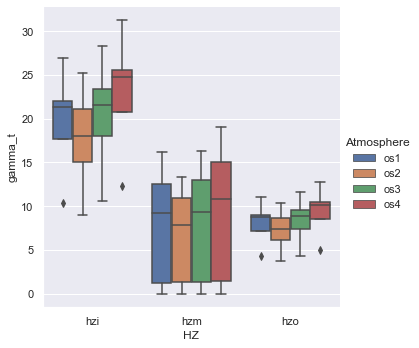

In [5]:
sns.catplot(x="HZ", y="gamma_t", hue="Atmosphere", kind="box", order=['hzi','hzm','hzo'], data=tar_table_df);

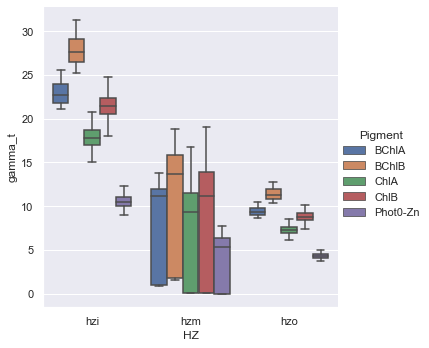

In [6]:
sns.catplot(x="HZ", y="gamma_t", hue="Pigment", kind="box", order=['hzi','hzm','hzo'],data=tar_table_df);

<AxesSubplot:xlabel='HZ', ylabel='Star'>

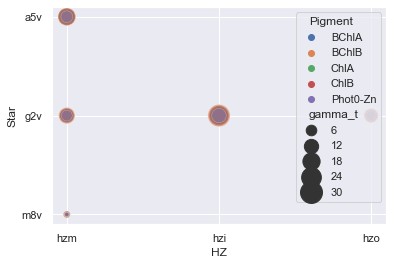

In [7]:
sns.scatterplot(x="HZ", 
                y="Star",
                size="gamma_t",
                sizes=(20,500),
                alpha=0.5,
                hue="Pigment",
                data=tar_table_df)

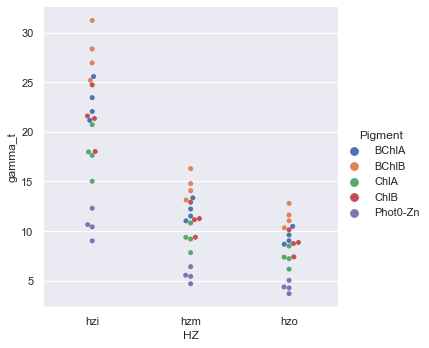

In [8]:
sns.catplot(x="HZ", y="gamma_t", hue="Pigment", kind="swarm", data=tar_table_df[tar_table_df['Star']=='g2v']);

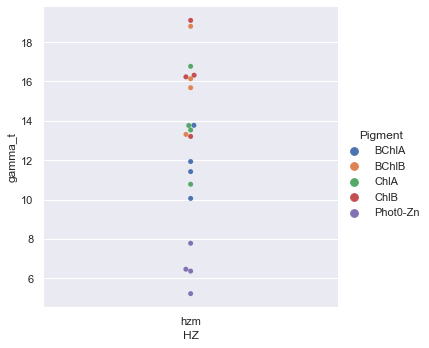

In [9]:
sns.catplot(x="HZ", y="gamma_t", hue="Pigment", kind="swarm", data=tar_table_df[tar_table_df['Star']=='a5v']);

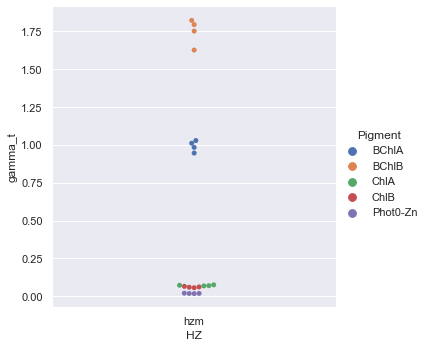

In [10]:
sns.catplot(x="HZ", y="gamma_t", hue="Pigment", kind="swarm", data=tar_table_df[tar_table_df['Star']=='m8v']);